# Algorithms: KMeans

In [2]:
%load ../rapaio-bootstrap.ipynb

Adding dependency io.github.padreati:rapaio-lib:7.0.0
Solving dependencies
Resolved artifacts count: 4
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/mima_cache/io/github/padreati/rapaio-lib/7.0.0/rapaio-lib-7.0.0.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/mima_cache/io/github/padreati/rapaio-code-gen/7.0.0/rapaio-code-gen-7.0.0.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/mima_cache/org/antlr/ST4/4.3.4/ST4-4.3.4.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/mima_cache/org/antlr/antlr-runtime/3.5.3/antlr-runtime-3.5.3.jar


In [3]:
// old faithful
Frame old = Datasets.loadOldFaithful();
old.printSummary()

Frame Summary
* rowCount: 272
* complete: 272/272
* varCount: 2
* varNames: 

0. eruptions : dbl | 
1.   waiting : int | 

* summary: 
 eruptions [dbl]       waiting [int]          Mean : 3.4877831    Mean : 70.8970588 
    Min. : 1.6000000    Min. : 43.0000000  2nd Qu. : 4.4542500 2nd Qu. : 82.0000000 
 1st Qu. : 2.1627500 1st Qu. : 58.0000000     Max. : 5.1000000    Max. : 96.0000000 
  Median : 4.0000000  Median : 76.0000000                                           



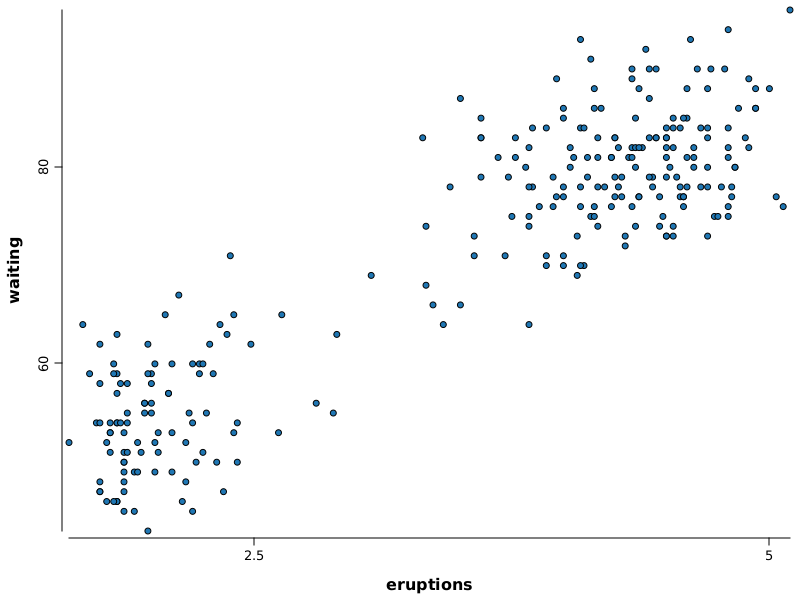

In [4]:
WS.image(points(old.rvar("eruptions"), old.rvar("waiting"), pch.circleFull(), fill(3)))

In [5]:
KMCluster model1 = KMCluster.newKMeans().k.set(2);
var res1 = model1.fit(old).predict(old);

In [6]:
res1.printSummary()

Overall errors: 
> count: 272
> mean: 32.7270909
> var: 1,622.7494621
> sd: 40.2833646
> inertia/error:8,901.7687209
> iterations:5

Per cluster: 
    ID count    mean         var      var/total     sd     
[0]  1   172 31.6604119 1,763.2348144 1.0865724 41.9908897 
[1]  2   100 34.5617787 1,391.1074822 0.8572534 37.2975533 


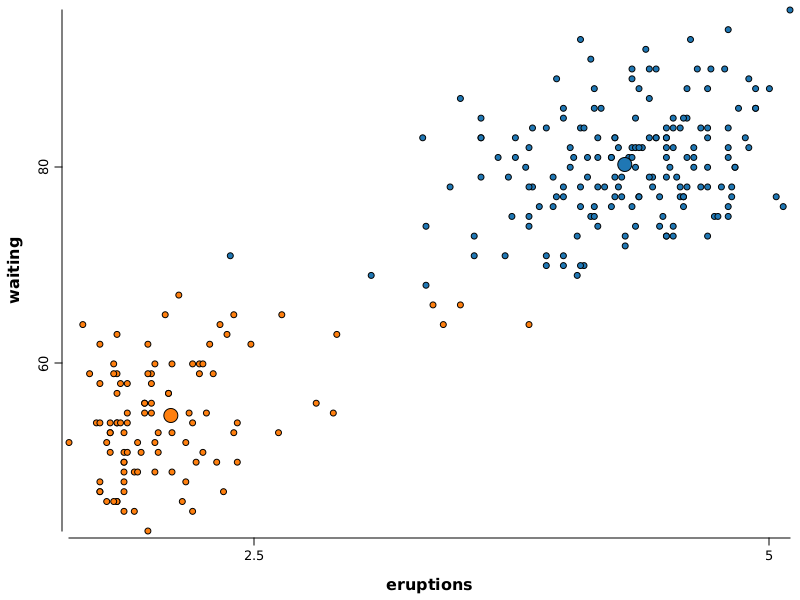

In [7]:
WS.image(
    points(old.rvar("eruptions"), old.rvar("waiting"), pch.circleFull(), fill(res1.assignment().darray_().add(3.0).dv()), color(0))
        .points(model1.getCentroids().rvar("eruptions"), model1.getCentroids().rvar("waiting"), pch.circleFull(), sz(7), fill(3, 4)))